In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# load image data
import os
from PIL import Image
from tqdm import tqdm


### Data source: https://zenodo.org/record/4002935

### Open the label file (labels-map-proj-v3.txt) and get the lable lines

In [3]:
# Download the dataset to the 'nasa_data/hirise-map-proj-v3_2' folder and open the file
# Labels are stored in labels-map-proj-v3.txt file
#################################################################

words_path = "nasa_data/hirise-map-proj-v3_2"
words_list = []

words = open(f"{words_path}/labels-map-proj_v3_2_train_val_test.txt", "r").readlines()
for line in words:
    if line.split(" ")[1] != "err":  # remove errored entries
        words_list.append(line)

print("Total label size:", len(words_list))

# print one example of the label line
print(words_list[0])


Total label size: 67810
ESP_013049_0950_RED-0067.jpg 7 train



### Get image data

In [5]:
# Handwritten text images are stored under the path (./nasa_data/map-proj-v3)
# Define a function to get the image path and image data
#################################################################################

base_image_path = os.path.join(words_path, "map-proj-v3_2")

def get_image_paths_and_labels(samples):
    paths = [] # all the paths
    corrected_samples = []  # all the labels
    train_paths = [] #train paths only
    val_paths = [] #val paths only
    test_paths = [] #test paths only
    train_samples = [] #train labels only
    val_samples = [] #val labels only
    test_samples = []   #test labels only

    for (i, file_line) in enumerate(samples):
        file_name = file_line.split(" ")[0]
        label = file_line.split(" ")[1]
        train_val_test = file_line.split(" ")[2].strip('\n')
        # Each line split will have this format for the corresponding image:
        # file_name.jpg
        img_path = os.path.join(base_image_path, file_name)
        if train_val_test == "train":
             
        #If the file doesn't exist at the path, path.getsize() will raise a FileNotFoundError exception
        # if the file is not found, skip it
            if os.path.exists(img_path) and os.path.getsize(img_path):
                paths.append(img_path)
                corrected_samples.append(label)
                train_paths.append(img_path)
                train_samples.append(label)

        else:
            if train_val_test == "val":

                if os.path.exists(img_path) and os.path.getsize(img_path):
                    paths.append(img_path)
                    val_paths.append(img_path)
                    val_samples.append(label)
                    corrected_samples.append(label)
    
            else:
                
                
                if os.path.exists(img_path) and os.path.getsize(img_path):
                    paths.append(img_path)
                    corrected_samples.append(label)
                    test_paths.append(img_path)
                    test_samples.append(label)

    return paths, corrected_samples, train_paths, val_paths, test_paths, train_samples, val_samples, test_samples

In [6]:
# process words_list
# img_paths, labels, img_list = get_image_paths_and_labels(words_list)
paths, corrected_samples, train_paths, val_paths, test_paths, train_samples, val_samples, test_samples = get_image_paths_and_labels(words_list)

In [7]:
# Path and Corrected Samples are for matched Image Paths and Labels in total
# train, val and test are for matched Image Paths and Labels in train, val and test sets 
# based on  the labels-map-proj_v3_2_train_val_test.txt file
print("Total image size:", len(paths))
print("Total label size:", len(corrected_samples))
print("Total train image size:", len(train_paths))
print("Total train label size:", len(train_samples))
print("Total val image size:", len(val_paths))
print("Total val label size:", len(val_samples))
print("Total test image size:", len(test_paths))
print("Total test label size:", len(test_samples))


Total image size: 33630
Total label size: 33630
Total train image size: 25272
Total train label size: 25272
Total val image size: 7496
Total val label size: 7496
Total test image size: 862
Total test label size: 862


In [8]:
# #save the dataframe as a csv file
# # nasa_df.to_csv('nasa_data/nasa_label.csv', index=False)

# load the csv file
label_desc = pd.read_csv('nasa_data/landmarks_map-proj-v3_classmap.csv', header=None)

# # create a dictionary from the csv file to show the class name for each label
label_dict = dict(zip(label_desc[0], label_desc[1]))  
label_dict

{0: 'other',
 1: 'crater',
 2: 'dark dune',
 3: 'slope streak',
 4: 'bright dune',
 5: 'impact ejecta',
 6: 'swiss cheese',
 7: 'spider'}

In [9]:
# change the labels to integer values
labels = [int(label) for label in corrected_samples]
train_labels = [int(label) for label in train_samples]
val_labels = [int(label) for label in val_samples]
test_labels = [int(label) for label in test_samples]

# create a new label description list with the class name
label_desc = []
for label in labels:
    label_desc.append(label_dict[label])

# create a new train label description list with the class name
train_label_desc = []
for label in train_labels:
    train_label_desc.append(label_dict[label])

# create a new val label description list with the class name
val_label_desc = []
for label in val_labels:
    val_label_desc.append(label_dict[label])

# create a new test label description list with the class name
test_label_desc = []
for label in test_labels:
    test_label_desc.append(label_dict[label])


print(label_desc[:5])
print("Length of label description list:", len(label_desc))
print("Length of train label description list:", len(train_label_desc))
print("Length of val label description list:", len(val_label_desc))
print("Length of test label description list:", len(test_label_desc))


['spider', 'spider', 'spider', 'spider', 'spider']
Length of label description list: 33630
Length of train label description list: 25272
Length of val label description list: 7496
Length of test label description list: 862


Text(0.5, 1.0, 'spider')

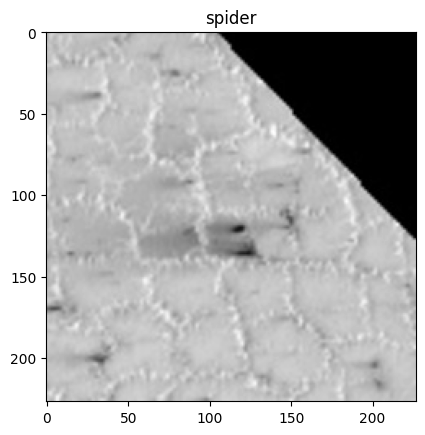

In [10]:
# show one sample image

#show the image
img_sample = Image.open(train_paths[4])
plt.imshow(img_sample, cmap='gray')

# set the image title to the corresponding label
plt.title(train_label_desc[4])

In [51]:
# count for each type of label in the label description list
label_count = {}
for label in label_desc:
    if label in label_count:
        label_count[label] += 1
    else:
        label_count[label] = 1

# save the label count dictionary to a dataframe
label_count_df = pd.DataFrame.from_dict(label_count, orient='index', columns=['count'])
label_count_df.index.name = 'label'
label_count_df = label_count_df.reset_index()
print("Total Label Count By Class:")
label_count_df

Total Label Count By Class:


,label,count
0,spider,787
1,crater,2855
2,impact ejecta,392
3,dark dune,430
4,slope streak,790
5,swiss cheese,1372
6,other,26171
7,bright dune,833


In [50]:
# count for each type of label in the train label description list
train_label_count = {}
for label in train_label_desc:
    if label in train_label_count:
        train_label_count[label] += 1
    else:
        train_label_count[label] = 1

# save the train label count dictionary to a dataframe
train_label_count_df = pd.DataFrame.from_dict(train_label_count, orient='index', columns=['count'])
train_label_count_df.index.name = 'label'
train_label_count_df = train_label_count_df.reset_index()
print("Train label count by Class:")
train_label_count_df


Train label count by Class:


,label,count
0,spider,549
1,crater,2121
2,impact ejecta,271
3,dark dune,313
4,slope streak,457
5,swiss cheese,943
6,other,19829
7,bright dune,789


In [47]:
# ### Split label line into training, validation and test

# # randomly shuffle the label data
# # Use 90% data for training, 5% for validation and 5% for test
# ####################################################################


# np.random.seed(100)
# np.random.shuffle(img_list)

# split_idx = int(0.9 * len(img_list))
# train_samples = img_list[:split_idx]
# test_samples = img_list[split_idx:]

# val_split_idx = int(0.5 * len(test_samples))
# validation_samples = test_samples[:val_split_idx]
# test_samples = test_samples[val_split_idx:]

# # # validate data split is done correctly
# assert len(img_list) == len(train_samples) + len(validation_samples) + len(test_samples)

# print(f"Final training size: {len(train_samples)}")
# print(f"Final validation size: {len(validation_samples)}")
# print(f"Final test size: {len(test_samples)}")
# print(f"Final data size: {len(img_list)}")
# print("\nA sample label line:", train_samples[0])
